This explains how to specify the colours used in the Muller plots and animations.  

The colours can be based on the clone fitness, any labels or genes mutated, 
whether the clone existed at the start of the simulation, and whether the mutation is non-syonymous or synonymous. 

In [1]:
%matplotlib inline
import numpy as np

In [2]:
from clone_competition_simulation import Parameters, ColourScale, get_CS_random_colours_from_colourmap
from clone_competition_simulation import Gene, MutationGenerator, FixedValue
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from collections import namedtuple

The default colour scale applies a random colour to each clone (from the matplotlib colormap gist_ncar), regardless of any properties of that clone.  

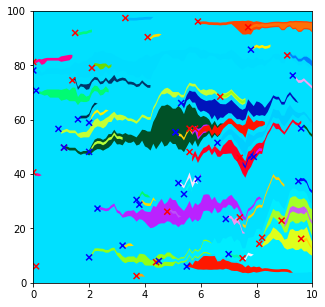

In [3]:
np.random.seed(4)
p = Parameters(algorithm='Moran', initial_cells=100, mutation_rates=0.05, print_warnings=False)
s = p.get_simulator()
s.run_sim()
s.muller_plot(figsize=(5, 5));

To use random colours from a different colourmap, but still ignore any clone properties, you can use the `get_CS_random_colours_from_colourmap` function.

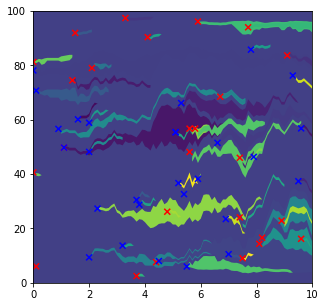

In [4]:
# Plot using the viridis colormap
np.random.seed(4)
p = Parameters(algorithm='Moran', initial_cells=100, mutation_rates=0.05, print_warnings=False, 
              colourscales=get_CS_random_colours_from_colourmap(cm.viridis)
              )
s = p.get_simulator()
s.run_sim()
s.muller_plot(figsize=(5, 5));

For assigning colours that depend on the clone properties you can use the ColourScales class.  

This can specify different colormaps based on any combination of the following clone properties:
- 'label' - any label applied to a clone
- 'ns' - whether the last mutation is synonymous or non-synonymous
- 'initial'  - whether the clone existed at the start of the simulation
- 'last_mutated_gene'  - just colouring based on the last gene
- 'genes_mutated'  - based on the combination of mutation in the clone
- fitness. This is treated a bit differently.  

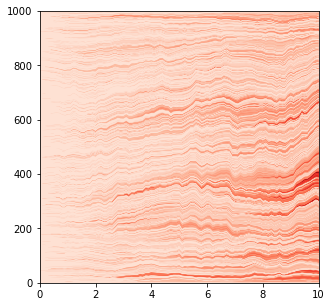

In [5]:
# Set up a colourscale where the fitter clones are darker red.  
cs0 = ColourScale(
    colourmaps=cm.Reds,
    use_fitness=True
)

# Set up some mutations that will increase fitness
mut_gen = MutationGenerator(genes=[Gene('Gene1', FixedValue(1.05), synonymous_proportion=0)])
np.random.seed(0)
p = Parameters(algorithm='Moran', initial_cells=1000,
               mutation_rates=0.2, print_warnings=False, 
              colourscales=cs0, mutation_generator=mut_gen
              )
s = p.get_simulator()
s.run_sim()
s.muller_plot(figsize=(5, 5), show_mutations_with_x=False);

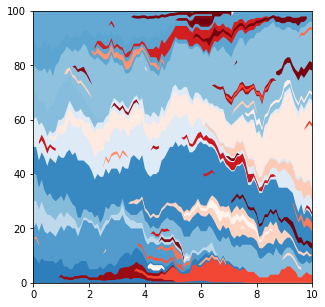

In [6]:
# Setting up a colourscale where the initial clones are blue, and subsequent mutations are red
# Within those colourscales, the clones will be assigned random colours

# First, define a namedtuple for the key
Key1 = namedtuple('key1', ['initial', ])

# Then define the colourscale with the colormaps used for each possible value of the key
cs1 = ColourScale(
    colourmaps={
        Key1(initial=True): cm.Blues,  # Initial clones are blue
        Key1(initial=False): cm.Reds   # Later clones are red
    }
)

np.random.seed(0)
p = Parameters(algorithm='Moran', initial_size_array=np.full(10, 10),   # 10 initial clones
               mutation_rates=0.05, print_warnings=False, 
              colourscales=cs1
              )
s = p.get_simulator()
s.run_sim()
s.muller_plot(figsize=(5, 5), show_mutations_with_x=False);

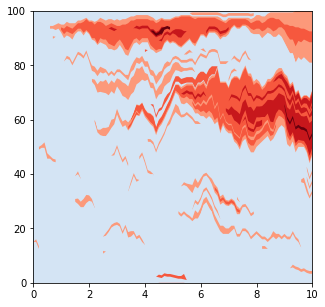

In [7]:
# Similar to above, a colourscale where the initial clones are blue, and subsequent mutations are red
# But this time the colours also depend on the clone fitness (instead of picking random colours)

# First, define a namedtuple for the key
Key1 = namedtuple('key1', ['initial', ])

# Then define the colourscale with the colormaps used for each possible value of the key
cs1 = ColourScale(
    colourmaps={
        Key1(initial=True): cm.Blues,  # Initial clones are blue
        Key1(initial=False): cm.Reds   # Later clones are red
    }, 
    use_fitness=True
)

mut_gen = MutationGenerator(genes=[Gene('Gene1', FixedValue(1.1), synonymous_proportion=0)])
np.random.seed(0)
p = Parameters(algorithm='Moran', initial_size_array=np.full(10, 10),   # 10 initial clones
               mutation_rates=0.05, print_warnings=False, 
              colourscales=cs1, mutation_generator=mut_gen
              )
s = p.get_simulator()
s.run_sim()
s.muller_plot(figsize=(5, 5), show_mutations_with_x=False);

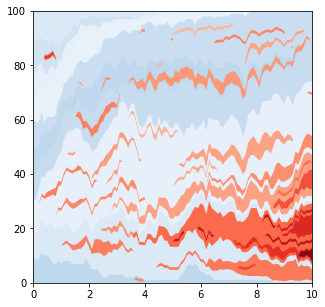

In [8]:
# To depend on fitness, but also a little random noise (to distinguish clones with identical fitness)
# Use all_clones_noisy=True

# First, define a namedtuple for the key
Key1 = namedtuple('key1', ['initial', ])

# Then define the colourscale with the colormaps used for each possible value of the key
cs1 = ColourScale(
    all_clones_noisy=True,
    colourmaps={
        Key1(initial=True): cm.Blues,  # Initial clones are blue
        Key1(initial=False): cm.Reds   # Later clones are red
    }, 
    use_fitness=True
)

mut_gen = MutationGenerator(genes=[Gene('Gene1', FixedValue(1.1), synonymous_proportion=0)])
np.random.seed(1)
p = Parameters(algorithm='Moran', initial_size_array=np.full(10, 10),   # 10 initial clones
               mutation_rates=0.05, print_warnings=False, 
              colourscales=cs1, mutation_generator=mut_gen
              )
s = p.get_simulator()
s.run_sim()
s.muller_plot(figsize=(5, 5), show_mutations_with_x=False);

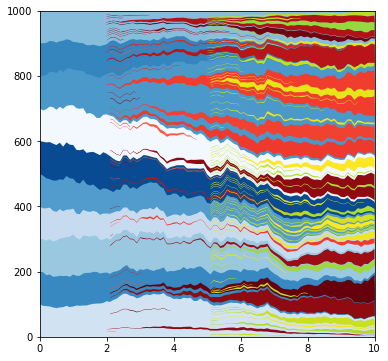

In [9]:
# A more complex colourscale. 
# initial clones are blue, cells with label 1 are red, cells with label 2 are yellow/green

# First, define a namedtuple for the key
Key2 = namedtuple('key1', ['initial', 'label' ])

# Then define the colourscale with the colormaps used for each possible value of the key
cs2 = ColourScale(
    colourmaps={
        Key2(initial=True, label=0): cm.Blues,  # Initial clones are blue
        
        # Label 1 clones are red. This scales the map so the values used (between 0 and 1) are all brighter reds
        Key2(initial=False, label=1): cm.ScalarMappable(norm=Normalize(vmin=-1, vmax=1), cmap=cm.Reds).to_rgba, 
        
        # Label 2 clones are yellow/green. Scaling the viridis colourmap to use those colours
        Key2(initial=False, label=2): cm.ScalarMappable(norm=Normalize(vmin=-5, vmax=1), cmap=cm.viridis).to_rgba 
    }
)

np.random.seed(0)
p = Parameters(algorithm='Moran', initial_size_array=np.full(10, 100),   # 10 initial clones
               label_times=[2, 5], label_frequencies=[0.05, 0.1],
               label_values=[1, 2], label_fitness=[1.5, 1.5],
               print_warnings=False, 
              colourscales=cs2
              )
s = p.get_simulator()
s.run_sim()
s.muller_plot(figsize=(6, 6), show_mutations_with_x=False);

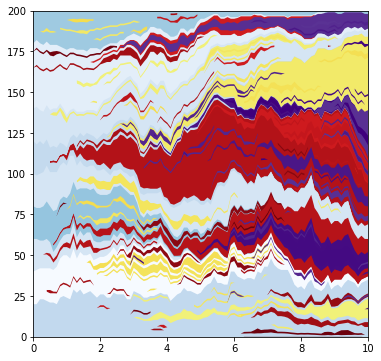

In [10]:
# Colouring based on the genes mutated

# Define two genes
mut_gen = MutationGenerator(
    genes=[
        Gene('Gene1', FixedValue(1.1), synonymous_proportion=0),
        Gene('Gene2', FixedValue(1.2), synonymous_proportion=0)
    ], 
    multi_gene_array=True   # This must be set to True
)

# Define the key
Key3 = namedtuple('key1', ['genes_mutated',])

# Then define the colourscale with the colormaps used for each possible value of the key
cs3 = ColourScale(
    colourmaps={
        # No genes mutated, light blue colour
        Key3(genes_mutated=(0,)): cm.ScalarMappable(norm=Normalize(vmin=0, vmax=2), cmap=cm.Blues).to_rgba,  
        
        # First gene mutated, dark Red
        Key3(genes_mutated=(0, 1,)): cm.ScalarMappable(norm=Normalize(vmin=-2, vmax=1), cmap=cm.Reds).to_rgba, 
        
        # Second gene mutated, yellow
        Key3(genes_mutated=(0, 2,)): cm.ScalarMappable(norm=Normalize(vmin=-20, vmax=2), cmap=cm.inferno).to_rgba,
        
        # Both genes mutated, purple
        Key3(genes_mutated=(0, 1, 2)): cm.ScalarMappable(norm=Normalize(vmin=-5, vmax=1), cmap=cm.Purples).to_rgba
    }
)

np.random.seed(0)
p = Parameters(algorithm='Moran', initial_size_array=np.full(10, 20),   # 10 initial clones
               mutation_rates=0.05, mutation_generator=mut_gen,
               print_warnings=False, colourscales=cs3
              )
s = p.get_simulator()
s.run_sim()
s.muller_plot(figsize=(6, 6), show_mutations_with_x=False);